# Detect a drastic change on a fixed perspective video stream 

* can be achieved with a static low res video image an onsite detection on low cost device
* can be anything, including machinery, forests, vulcano, etc.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 8)

In [2]:
import cv2 as cv
import numpy as np

In [3]:
backSub = cv.createBackgroundSubtractorMOG2(detectShadows=False) # 200 fps
# backSub = cv.createBackgroundSubtractorMOG2(detectShadows=True) # 160 fps
# backSub = cv.createBackgroundSubtractorKNN()

In [4]:
!ls -l

total 3597
-rw-r--r-- 1 olive 197609  223747 Dec 22 19:07 bbox.ipynb
-rw-r--r-- 1 olive 197609 1115888 Dec 28 17:03 bsub.ipynb
-rw-r--r-- 1 olive 197609    7334 Dec 28 11:46 cnn.ipynb
-rw-r--r-- 1 olive 197609 2065088 Dec 28 17:15 dramatic-change.ipynb
-rw-r--r-- 1 olive 197609  227193 Dec 28 16:52 Lake_Dunlap_collapse.mp4
-rw-r--r-- 1 olive 197609    1095 Dec 28 11:39 LICENSE
-rw-r--r-- 1 olive 197609   25722 Dec 21 17:25 people.jpg
-rw-r--r-- 1 olive 197609     129 Dec 28 11:39 README.md


In [5]:
# capture = cv.VideoCapture('./vtest.avi')
capture = cv.VideoCapture('./Lake_Dunlap_collapse.mp4')

In [6]:
_, frame = capture.read()

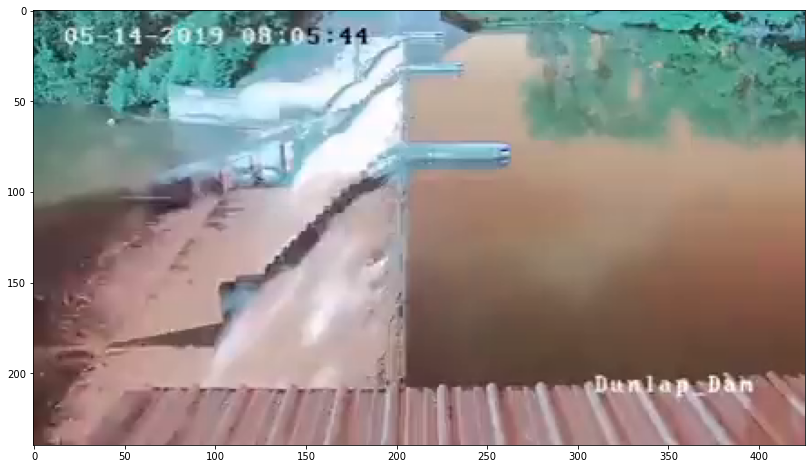

In [7]:
plt.imshow(frame);

In [8]:
%%time
original_frames = []
frames = []

while True:
    ret, frame = capture.read()
    if frame is None:
        break

    original_frames.append(frame)
    fgMask = backSub.apply(frame)
    frames.append(fgMask)

Wall time: 1.46 s


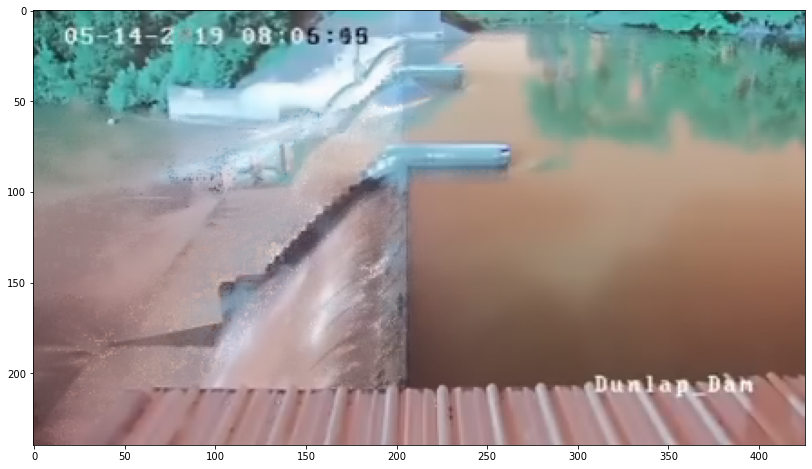

In [9]:
bg = backSub.getBackgroundImage()
plt.imshow(bg);

In [10]:
len(frames)

899

In [11]:
idx = 1 # all fine
# idx = 500 # shit hits the fan

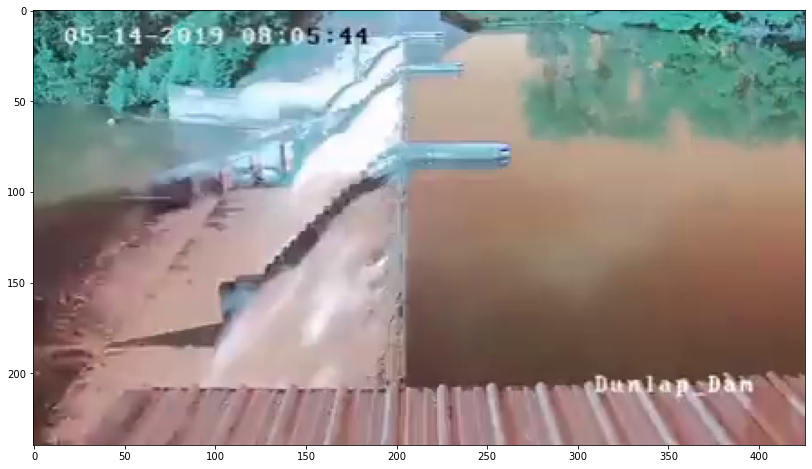

In [12]:
original_frame = original_frames[idx]
plt.imshow(original_frame);

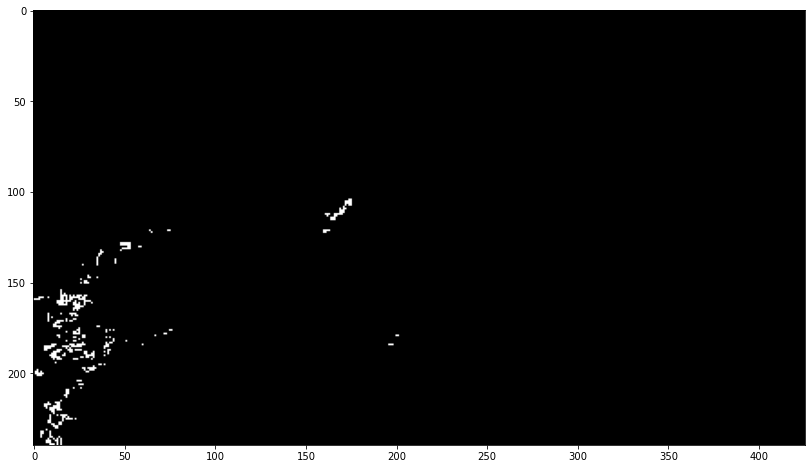

In [13]:
frame = frames[idx]
plt.imshow(frame, cmap='gray');

In [14]:
deviations = []
for frame in frames:
    unique, unique_counts = np.unique(frame, return_counts=True)
    if len(unique_counts) == 2:
        nothing, deviation = unique_counts
    else:
        deviation = 0
    deviations.append(deviation)

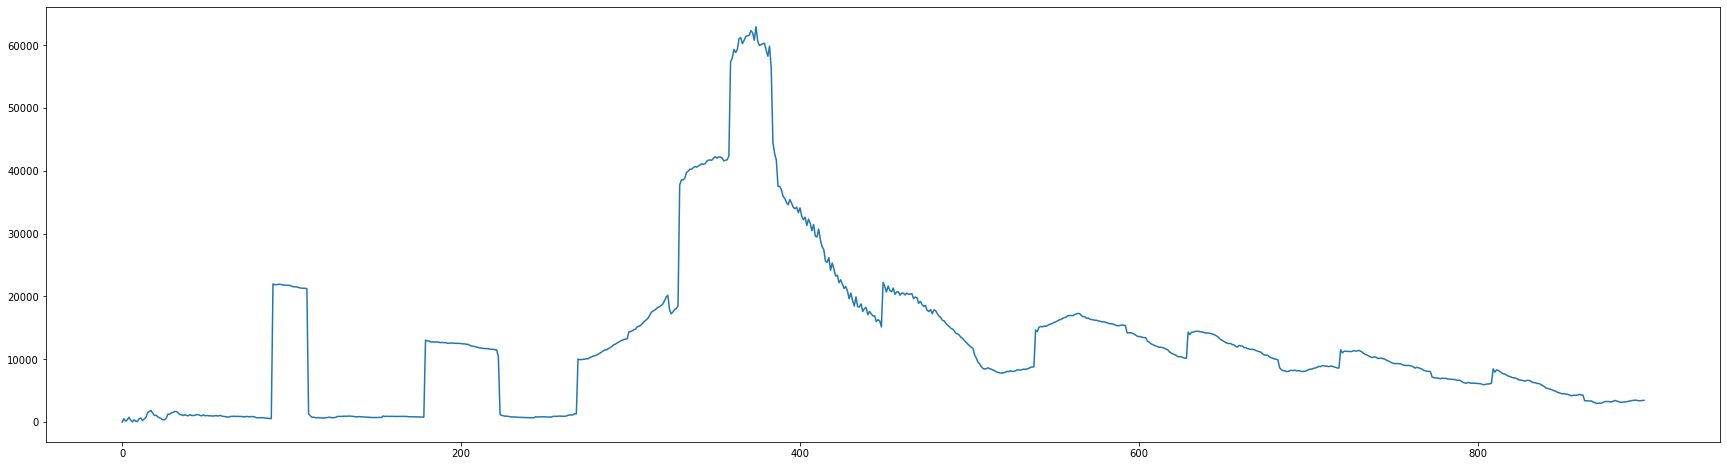

In [15]:
plt.plot(deviations);

In [16]:
# we see a glitch in the video here, but this can be calibrated out by thresholding
# idx = 100
idx = 380 # shit hits the fan

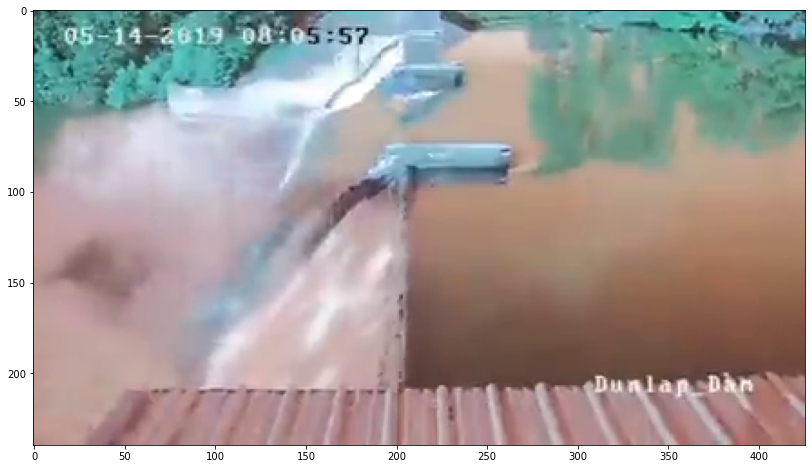

In [17]:
original_frame = original_frames[idx]
plt.imshow(original_frame);

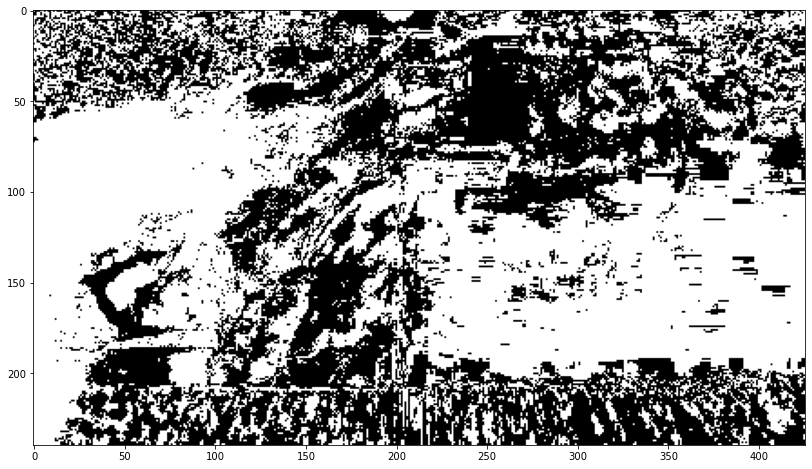

In [18]:
frame = frames[idx]
plt.imshow(frame, cmap='gray');